# Modeling 

In this notebook we start to build machine learning models. We hot encode the data set given that mayority of features are categorical. We also test 2 different splits of data as well as 3 different models. Then we will determined best model by assesing their performance.

## Imports

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [3]:
# Load updated df
df = pd.read_csv("../Data/df_updated.csv")

In [4]:
df.shape

(5265, 33)

In [5]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Skin symptoms,1,1,1,1,1
Season born,1.0,2.0,2.0,1.0,4.0
Heating system_house,1.0,2.0,1.0,2.0,1.0
House _now,NaN,2.0,3.0,4.0,3.0
House_before,NaN,3.0,1.0,NaN,1.0
Clean_house,2.0,2.0,2.0,2.0,2.0
Puppy_dewormed,1.0,1.0,1.0,1.0,1.0
Puppy_vaccinated,1.0,1.0,1.0,1.0,1.0
Dam_dewormed_prebirth,NaN,1.0,1.0,1.0,1.0


In [6]:
print(df['Skin symptoms'].value_counts())

1    4332
2     933
Name: Skin symptoms, dtype: int64


In [7]:
# Dropping irrelevant/ too many null values/ mirrowing features of the target variable. 
df.drop([ 'Unnamed: 0', 'Vet diagnosis', 'Obey', 'Reps_lower', 'Reps_upper', 'Height_low_inches', 'Height_high_inches', 'Weight_low_lbs', 'Weight_high_lbs'], axis=1, inplace=True)

In [8]:
# Renaming target variable 
df.rename(columns = {'Skin symptoms':'Skin_symptoms'}, inplace = True)

In [9]:
# Correlation of original features 
correlation_mat = df.corr()

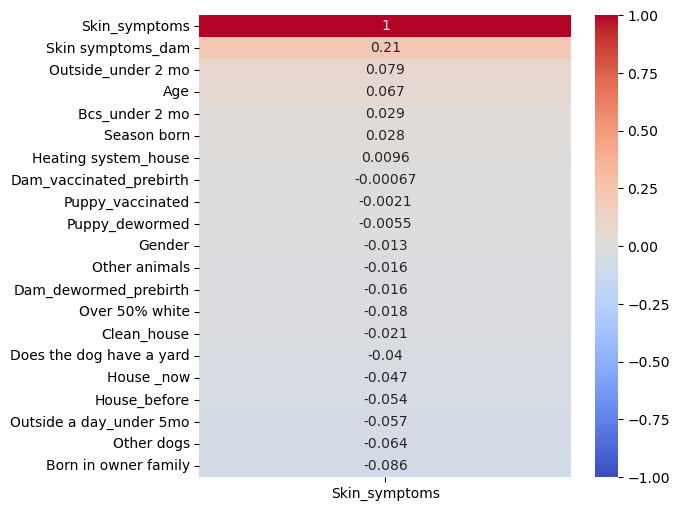

In [10]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation_mat[['Skin_symptoms']].sort_values(by=['Skin_symptoms'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.show()

As seen in our EDA, skin symptoms present in the dam (puppy's mom) seems to have some correlation to the presence of skin condition (hereditary feature probably). 

Outside under 2 months (8-weeks) is our second most positive correlated feature. This could make sense given that based on veterinary recommendation *petMD by Chewy*, puppies should not go outside in public until two weeks after their last vaccine is given (18-22 weeks old). Multiple reasons are provided as to why. One's backyard should be safe but public spaces like dog parks, pet friendly stablishments, and boarding might increase the chances of infection or be a contaminated environment. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5265 entries, 0 to 5264
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Skin_symptoms             5265 non-null   int64  
 1   Season born               5140 non-null   float64
 2   Heating system_house      4762 non-null   float64
 3   House _now                5238 non-null   float64
 4   House_before              3930 non-null   float64
 5   Clean_house               5239 non-null   float64
 6   Puppy_dewormed            4998 non-null   float64
 7   Puppy_vaccinated          5080 non-null   float64
 8   Dam_dewormed_prebirth     3524 non-null   float64
 9   Dam_vaccinated_prebirth   5265 non-null   int64  
 10  Gender                    5124 non-null   float64
 11  Over 50% white            4991 non-null   float64
 12  Other animals             5265 non-null   int64  
 13  Other dogs                5265 non-null   int64  
 14  Born in 

## Encoding catergorical features with get_dummies

Given that some features are categorical (in this case most features) we will need to transform/encode these to be used in some machine learning models. We will use dummy encoding where each possible value of a feature becomes a new column, and a 1 is placed in that column if the data instance (a row of the data) contained that value, and a 0 is placed in that column otherwise.

In [12]:
categorical_features = ['Season born',
                        'Heating system_house',
                        'House _now',
                        'House_before',
                        'Clean_house',
                        'Puppy_dewormed',
                        'Puppy_vaccinated',
                        'Dam_dewormed_prebirth',
                        'Dam_vaccinated_prebirth',
                        'Gender',
                        'Over 50% white',
                        'Other animals',
                        'Other dogs',
                        'Born in owner family',
                        'Does the dog have a yard',
                        'Bcs_under 2 mo', 
                        'Outside_under 2 mo',
                        'Outside a day_under 5mo',
                        'Skin symptoms_dam']

In [13]:
#get_dummies with na column as well to not fill in values with mode
df1 = pd.get_dummies(df, columns = categorical_features, dummy_na=True).copy()
print('The data have ', df1.shape[0], ' rows and ', df1.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(df1.columns)))

The data have  5265  rows and  78  columns

column names: 

Skin_symptoms
Age
Breed_En
Classification
Category
Season born_1.0
Season born_2.0
Season born_3.0
Season born_4.0
Season born_nan
Heating system_house_1.0
Heating system_house_2.0
Heating system_house_nan
House _now_1.0
House _now_2.0
House _now_3.0
House _now_4.0
House _now_nan
House_before_1.0
House_before_2.0
House_before_3.0
House_before_4.0
House_before_nan
Clean_house_1.0
Clean_house_2.0
Clean_house_nan
Puppy_dewormed_0.0
Puppy_dewormed_1.0
Puppy_dewormed_nan
Puppy_vaccinated_0.0
Puppy_vaccinated_1.0
Puppy_vaccinated_nan
Dam_dewormed_prebirth_0.0
Dam_dewormed_prebirth_1.0
Dam_dewormed_prebirth_nan
Dam_vaccinated_prebirth_0.0
Dam_vaccinated_prebirth_1.0
Dam_vaccinated_prebirth_nan
Gender_1.0
Gender_2.0
Gender_nan
Over 50% white_1.0
Over 50% white_2.0
Over 50% white_nan
Other animals_1.0
Other animals_2.0
Other animals_nan
Other dogs_1.0
Other dogs_2.0
Other dogs_nan
Born in owner family_1.0
Born in owner family_2.0
Born 

In [14]:
# Corraborating correlation after get_dummies completed
correlation_mat1 = df1.corr()

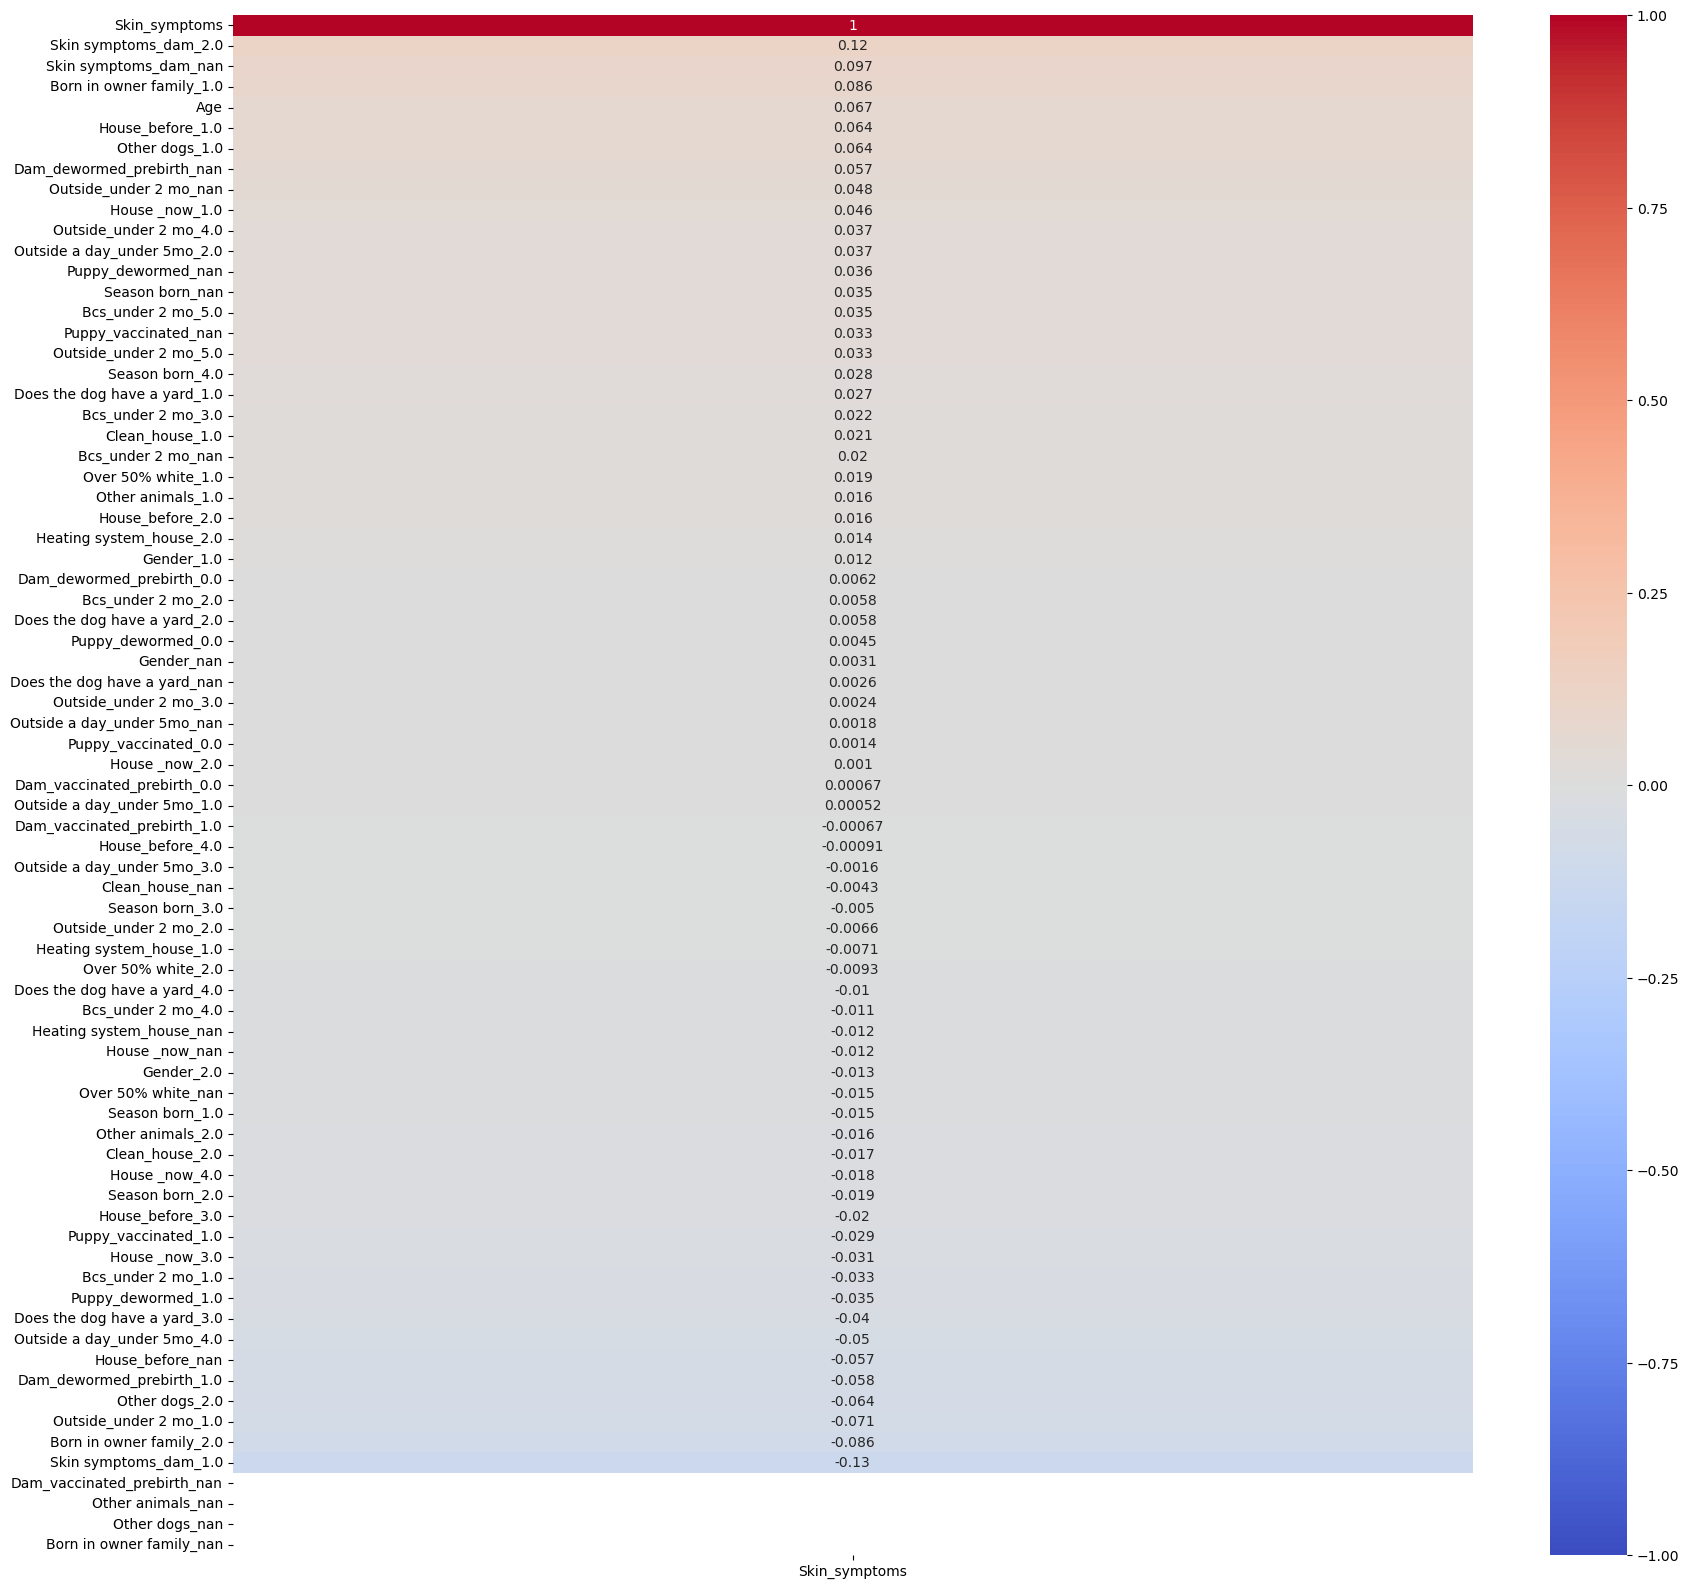

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_mat1[['Skin_symptoms']].sort_values(by=['Skin_symptoms'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.show()

The correlation values after one hot encoding the data are smaler with the top positive feature at 0.12 compared to 0.21 when not encoded. However, this is because our top feature before was the grouped feature of skin symptoms present in dam. This correlation matrix provides a deeper view of the actual correlation between values. As suspected before, the dam having skin symptoms (2) seems to be the most positively correlated feature. 

Unlike our previous correlation matrix, our next positive features are null values for skin symptoms in dam which might be a problem as it is missing information from original set, followed by the puppy NOT being born in owner family (1). 

## Defining X, y and splitting dataset train/test

In order to evaluate and try to preserve as much as possible the proportions among classes, we split the data with basic train_test_split and also with stratify=y. Models will be trained and performance measured on both to identify which split helps the model perform better. 

In [16]:
#Define X
X = df1.drop(columns = ['Skin_symptoms'])
print("X: ", type(X), X.shape)

X:  <class 'pandas.core.frame.DataFrame'> (5265, 77)


In [17]:
#Define y
y = df1['Skin_symptoms']
print("y: ", type(y), y.shape)

y:  <class 'pandas.core.series.Series'> (5265,)


#### Split with no stratify 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=2)

In [19]:
names_list = ['Breed_En', 'Classification', 'Category']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((3948, 74), (1317, 74))

In [20]:
#Filling Age missing values with mean given that range is small and median and mode are close
X_age_mean = X_train['Age'].mean()

In [21]:
X_train['Age'] = X_train['Age'].fillna(X_age_mean)
X_test['Age'] = X_test['Age'].fillna(X_age_mean)

#### Split with stratify to try to preserve the proportions among the classes.

In [22]:
Xlrstrat, Xtestlrstrat, ylrstrat, ytestlrstrat = train_test_split(X, y, random_state = 2, stratify = y)
print('Training split has ', Xlrstrat.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ylrstrat))+ ')')
print('Test split has ', Xtestlrstrat.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ytestlrstrat)) + ')')

Training split has  3948  rows
 and the corresponding labels have an equal number of values. (3948)
Test split has  1317  rows
 and the corresponding labels have an equal number of values. (1317)


In [23]:
names_list = ['Breed_En', 'Classification', 'Category']
names_train = Xlrstrat[names_list]
names_test = Xtestlrstrat[names_list]
Xlrstrat.drop(columns=names_list, inplace=True)
Xtestlrstrat.drop(columns=names_list, inplace=True)
Xlrstrat.shape, Xtestlrstrat.shape

((3948, 74), (1317, 74))

In [24]:
# Filling Age NaN with mean
X_age_mean = Xlrstrat['Age'].mean()
X_age_mean

3.9082156611039793

In [25]:
Xlrstrat['Age'] = Xlrstrat['Age'].fillna(X_age_mean)
Xtestlrstrat['Age'] = Xtestlrstrat['Age'].fillna(X_age_mean)

Given that the split parameter was not included, the train_test_split with stratify is 75%/25% (same as specified for last split and used same random_state to maintain the same data throughout for analysis.

# Models

### Logistic Regression 

#### Model with basic split

In [26]:
# Creating object with Logistic Regression. 
clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)

In [27]:
#Fit to build model 
clf.fit(X_train, y_train) 

LogisticRegression(max_iter=500, solver='newton-cg')

In [28]:
#Predict 
y_predict_test = clf.predict(X_test)
y_predict_training = clf.predict(X_train)

In [29]:
print("[Test] Accuracy score (y_predict_test, y_test):",
      f'{accuracy_score(y_predict_test, y_test):.2f}')
print("[Training] Accuracy score: (y_train, y_predict_training)", 
      f'{accuracy_score(y_train, y_predict_training):.2f}')

[Test] Accuracy score (y_predict_test, y_test): 0.80
[Training] Accuracy score: (y_train, y_predict_training) 0.83


The model's test accuracy (0.80) is slightly better to the training accuracy (0.83). This is an indication that the model will generalize well, which means that the model will be well-behaved when new data is presented to it. 

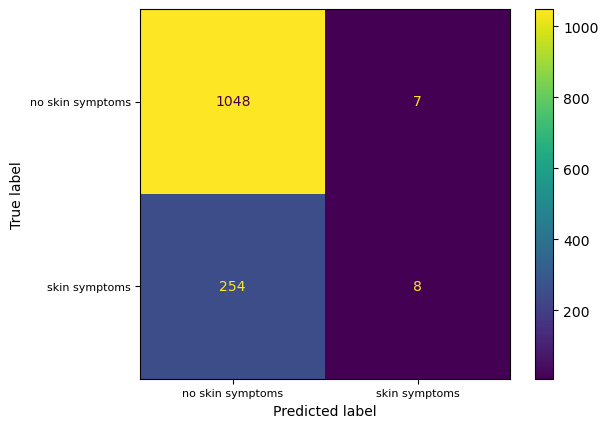

In [30]:
#Visualizing predictions
cm = confusion_matrix(y_test, y_predict_test, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no skin symptoms', 'skin symptoms'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no skin symptoms', 'skin symptoms'], fontsize = 8)
ax.set_yticklabels(labels = ['no skin symptoms', 'skin symptoms'], fontsize = 8)
display_cm.plot(ax = ax)

From the chart we can see that while the overall accuracy was 80%, when we predict skin condition, 47% (7 of 15) of the time we are predicting a false positive, while the false negatives (predicting no skin symptoms when in fact there is skin symptom) is about 20% (254 of 1302).

In [32]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.80      0.99      0.89      1055
           2       0.53      0.03      0.06       262

    accuracy                           0.80      1317
   macro avg       0.67      0.51      0.47      1317
weighted avg       0.75      0.80      0.72      1317



#### Model with stratify split

In [33]:
# Creating object with Logistic Regression. 
clf1 = LogisticRegression(solver = 'newton-cg', max_iter = 500)

In [34]:
#Fit to build model 
clf1.fit(Xlrstrat, ylrstrat) 

LogisticRegression(max_iter=500, solver='newton-cg')

In [35]:
#Predict 
y_predict_test = clf1.predict(Xtestlrstrat)
y_predict_training = clf1.predict(Xlrstrat)

In [36]:
print("[Test] Accuracy score (y_predict_test, ytestlrstrat):",
      f'{accuracy_score(y_predict_test, ytestlrstrat):.2f}')
print("[Training] Accuracy score: (ylrstrat, y_predict_training)", 
      f'{accuracy_score(ylrstrat, y_predict_training):.2f}')

[Test] Accuracy score (y_predict_test, ytestlrstrat): 0.83
[Training] Accuracy score: (ylrstrat, y_predict_training) 0.82


Since the model's test accuracy (0.83) is very close to the training accuracy (0.82), there is a very small variance between the training accuracy and the test accuracy. 
This is an indication that the model will generalize well, which means that the model will be well-behaved when new data is presented to it.
However, accuracy can be deceiving when measuring model performance of a classification algorithm so we will go further into other metrics: 

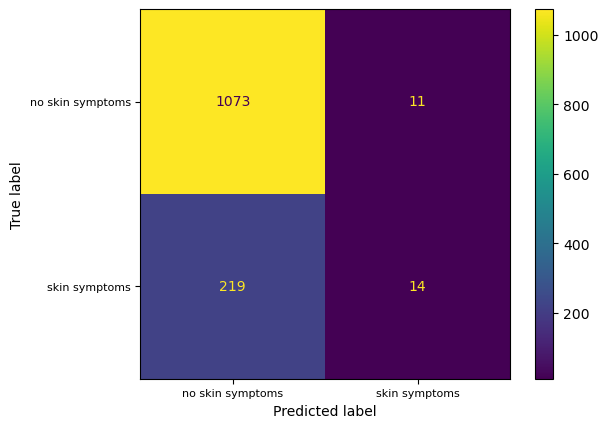

In [37]:
#Visualizing predictions
cm = confusion_matrix(ytestlrstrat, y_predict_test, labels = clf1.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no skin symptoms', 'skin symptoms'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no skin symptoms', 'skin symptoms'], fontsize = 8)
ax.set_yticklabels(labels = ['no skin symptoms', 'skin symptoms'], fontsize = 8)
display_cm.plot(ax = ax)

From the chart we can see that while the overall accuracy was 83%, when we predict skin condition, 44% (11 of 25) of the time we are predicting a false positive, while the false negatives (predicting no skin symptoms when in fact there is skin symptom) is about 17% (219 of 1292). 

The above results are slightly better when using the train/test split that has used stratify. 

This information can be discussed to decide which is more important, reducing false positives or false negatives, assuming overall accuracy is acceptable. 

Let's check a classification_report:

In [39]:
print(classification_report(ytestlrstrat, y_predict_test))

              precision    recall  f1-score   support

           1       0.83      0.99      0.90      1084
           2       0.56      0.06      0.11       233

    accuracy                           0.83      1317
   macro avg       0.70      0.52      0.51      1317
weighted avg       0.78      0.83      0.76      1317



As seen with the confusion matrix, this model is very good when it comes to predicting NO skin symptoms (f1-score at 90%, precision as 83%), however, it has a significantly low score across the board when it comes to predicting a positive skin symptom (f1 score at 7-11%%, precision as 61-56%). 

Lets see if the train-test split is affecting these results. 

In [40]:
# Generate 25 unique experiments varying the train-test splot indices within original data. 
training_accuracy = []
test_accuracy = []
accuracy_difference = []

n_splits = 25

clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)

for i in range(0, n_splits):

    Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, stratify = y, random_state = i)
    
    names_list = ['Breed_En', 'Classification', 'Category']
    names_train = Xlr[names_list]
    names_test = Xtestlr[names_list]
    Xlr.drop(columns=names_list, inplace=True)
    Xtestlr.drop(columns=names_list, inplace=True)
    
    Xlr['Age'] = Xlr['Age'].fillna(X_age_mean)
    Xtestlr['Age'] = Xtestlr['Age'].fillna(X_age_mean)

    clf.fit(Xlr, ylr)

    y_predict_training = clf.predict(Xlr)

    y_predict_test = clf.predict(Xtestlr)

    tr_accuracy = accuracy_score(y_predict_training, ylr)
    training_accuracy.append(tr_accuracy)

    tst_accuracy = accuracy_score(y_predict_test, ytestlr)
    test_accuracy.append(tst_accuracy)

    accuracy_difference.append(tst_accuracy - tr_accuracy)

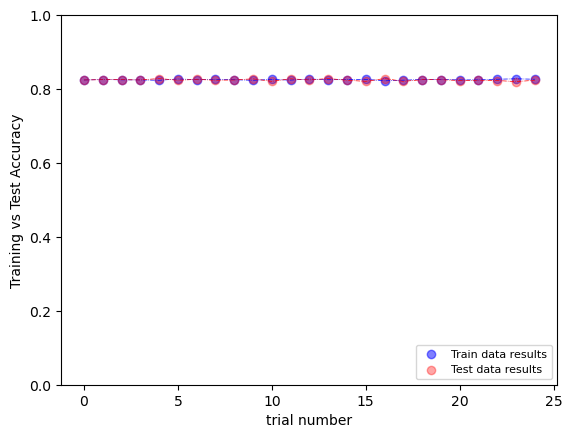

In [41]:
# Now we plot all the trials for both the training and test data to compare results. 
fig, ax = plt.subplots()
ax.scatter(range(len(training_accuracy)),
           training_accuracy, 
           color = 'blue', 
           alpha = 0.5,
           label = 'Train data results')
ax.plot(range(len(training_accuracy)),
        training_accuracy, 
        color = 'blue', 
        linestyle = '-.',
        linewidth = 0.5)
ax.scatter(range(len(test_accuracy)),
           test_accuracy, 
           color = 'red', 
           alpha = 0.35, 
           label = 'Test data results')
ax.plot(range(len(test_accuracy)),
        test_accuracy, 
        color = 'red', 
        linestyle = '-.',
        linewidth = 0.5)
ax.legend(fontsize = 8, loc = "lower right")
ax.set_ylabel('Training vs Test Accuracy')
ax.set_ylim(0, 1)
ax.set_xlabel('trial number')
plt.show()

The accuracy on the train and test split are relatively constant. 

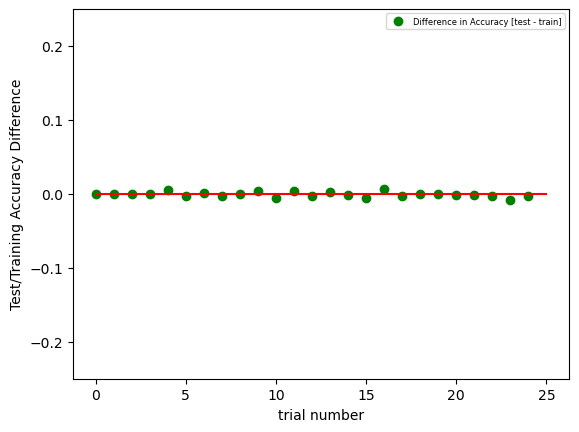

In [42]:
fig, ax = plt.subplots()
ax.scatter(range(len(accuracy_difference)),
           accuracy_difference, 
           color = 'green', 
           label = 'Difference in Accuracy [test - train]')
ax.plot([0, len(accuracy_difference)], [0, 0], 'red')
ax.legend(fontsize = 6)
ax.set_ylabel('Test/Training Accuracy Difference')
ax.set_ylim(-0.25, 0.25)
ax.set_xlabel('trial number')
plt.show()


In this case, the test accuracy is rarely better or worse than training and not by much. Split is not the issue with performance. Lets check other models to see if they better adjust to the class imbalance. 

## Random Forest Classifier 

#### Model with basic split

In [43]:
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [44]:
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.802
Random Forest: f1-score=0.724


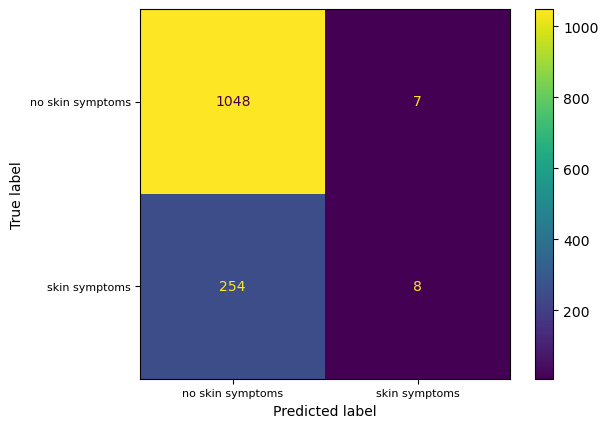

In [45]:
#Visualizing predictions
rf = confusion_matrix(y_test, y_pred, labels = clf.classes_)
_, ax = plt.subplots()
display_rf = ConfusionMatrixDisplay(confusion_matrix = rf, 
                                    display_labels = ['no skin symptoms', 'skin symptoms'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no skin symptoms', 'skin symptoms'], fontsize = 8)
ax.set_yticklabels(labels = ['no skin symptoms', 'skin symptoms'], fontsize = 8)
display_rf.plot(ax = ax)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.99      0.89      1055
           2       0.53      0.03      0.06       262

    accuracy                           0.80      1317
   macro avg       0.67      0.51      0.47      1317
weighted avg       0.75      0.80      0.72      1317



Similar to the logistic regression the random forest classifier is also not very good at predicting skin symptoms accurately. 

30


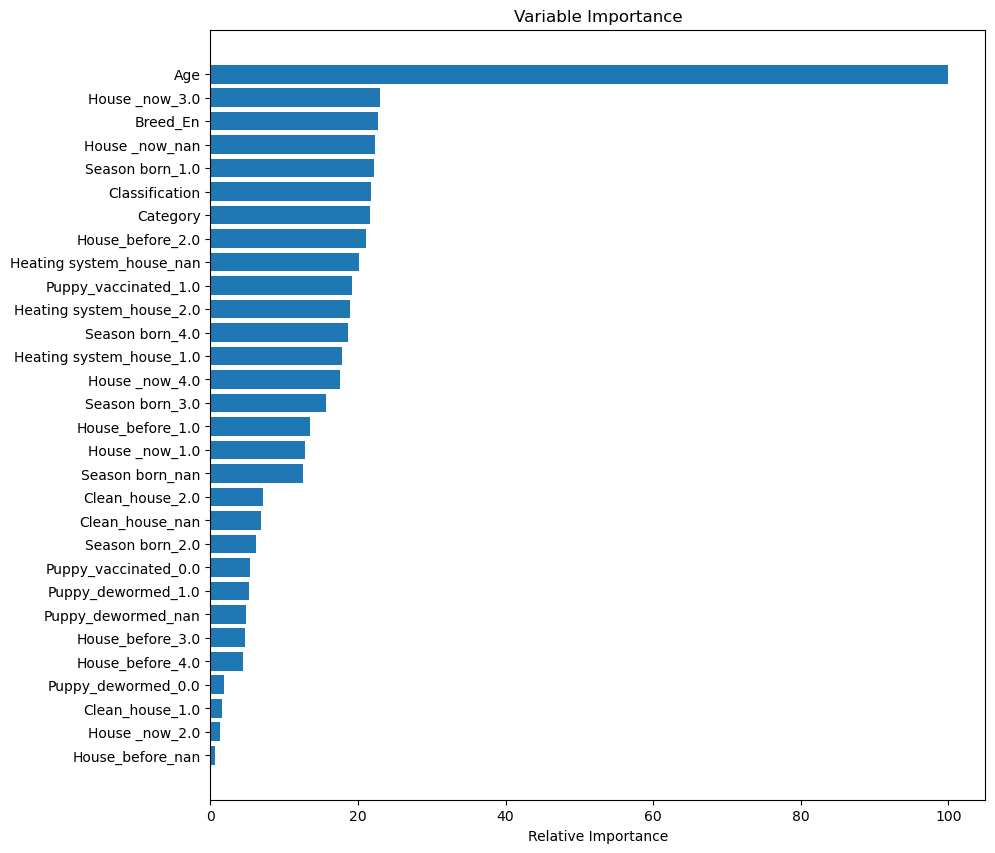

In [47]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#### Model with stratify split

In [48]:
clf2 = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf2.fit(Xlrstrat, ylrstrat)
y_pred = model_res.predict(Xtestlrstrat)
y_pred_prob = model_res.predict_proba(Xtestlrstrat)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(ytestlrstrat, y_pred)

f1 = f1_score(ytestlrstrat, y_pred, average='weighted')
cm = confusion_matrix(ytestlrstrat, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.821
Random Forest: f1-score=0.753


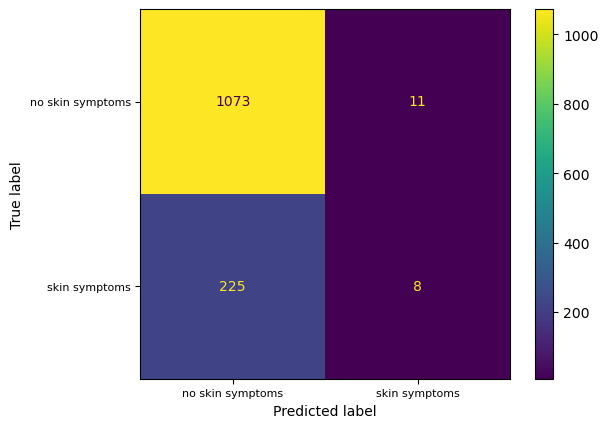

In [49]:
#Visualizing predictions
rf = confusion_matrix(ytestlrstrat, y_pred, labels = clf2.classes_)
_, ax = plt.subplots()
display_rf = ConfusionMatrixDisplay(confusion_matrix = rf, 
                                    display_labels = ['no skin symptoms', 'skin symptoms'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no skin symptoms', 'skin symptoms'], fontsize = 8)
ax.set_yticklabels(labels = ['no skin symptoms', 'skin symptoms'], fontsize = 8)
display_rf.plot(ax = ax)

In [50]:
print(classification_report(ytestlrstrat, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.99      0.90      1084
           2       0.42      0.03      0.06       233

    accuracy                           0.82      1317
   macro avg       0.62      0.51      0.48      1317
weighted avg       0.75      0.82      0.75      1317



With stratify the prediction of no skin symptoms improves slightly (as well as overall accuracy), but the precision of positive skin symptoms worsens. The weighted f1-score is better but simply because of the reason above. 

30


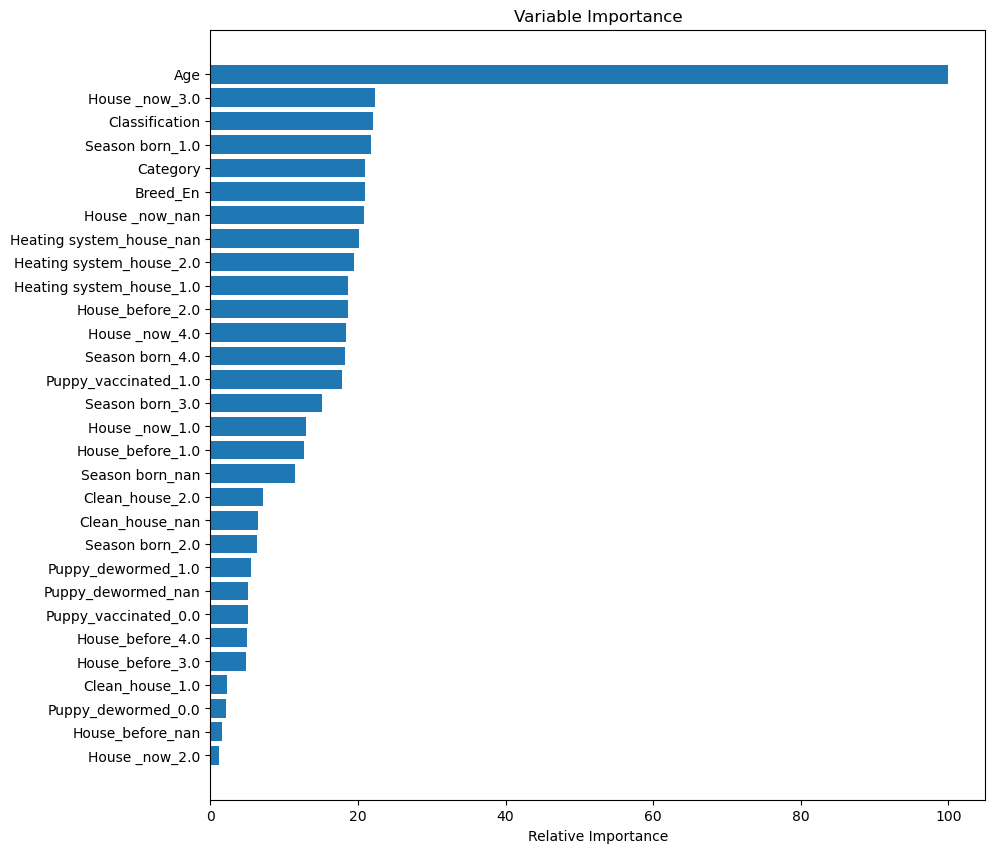

In [51]:
feature_importance = clf2.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Looking at the relative importance: 
- No stratify: 
    1. Age
    2. House now 3 (detached wood)
    3. Breed 
- With stratify: 1. 
    1. Age 
    2. House now 3 
    3. Classification

Interestingly, the 3rd top important feature is placed 6th on the other comparable model. Season born 1 (Winter) is also present on both as top 5 which could indicate this conditions can increase chances of skin conditions on puppies. 

### KNeighborsClassifier

#### Model with basic split

In [52]:
test_scores = []
train_scores = []

neighbors = list(range(1,10))
for i in neighbors:

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test,y_test))

In [53]:
print('Train scores:', train_scores, '\n')
print('Test scores:', test_scores, '\n')

Train scores: [0.9989868287740629, 0.8543566362715299, 0.85790273556231, 0.8404255319148937, 0.8421985815602837, 0.8358662613981763, 0.8338399189463019, 0.8320668693009119, 0.8333333333333334] 

Test scores: [0.7198177676537585, 0.788914198936978, 0.7668944570994685, 0.7873955960516325, 0.7722095671981777, 0.7949886104783599, 0.7843583902809416, 0.7972665148063781, 0.7949886104783599] 



In [54]:
print("Optimal number of neighbors for training data:", neighbors[train_scores.index(max(train_scores))])

Optimal number of neighbors for training data: 1


In [55]:
print("Optimal number of neighbors for test data:", neighbors[test_scores.index(max(test_scores))])

Optimal number of neighbors for test data: 8


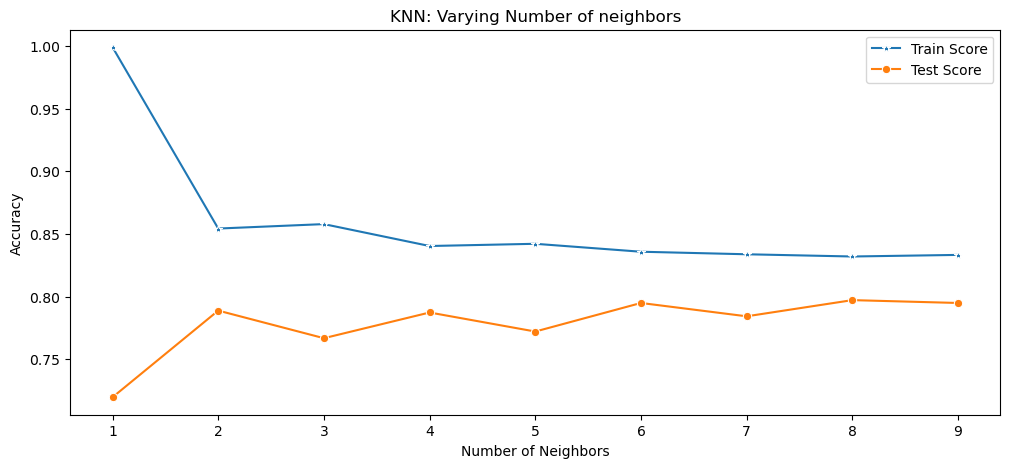

In [56]:
plt.figure(figsize=(12,5))
plt.title('KNN: Varying Number of neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

Based on the above information, the optimal number of neighbors for this model is 8 which is where it gets the closest to our train score. 

In [57]:
# Fit and score the best number of neighbors based on plot. 
i=8
knn = KNeighborsClassifier(i)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

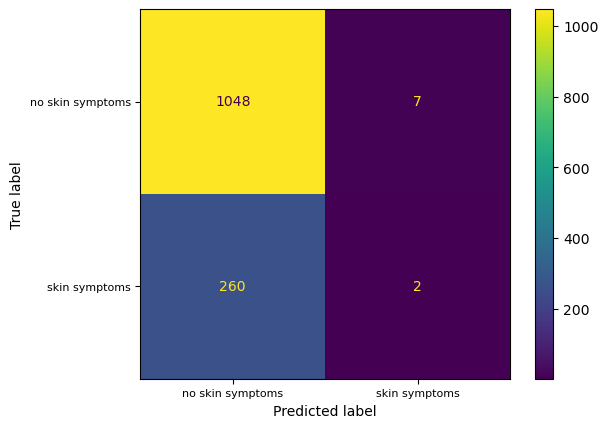

In [58]:
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred, labels = clf.classes_)
_, ax = plt.subplots()
display_pl = ConfusionMatrixDisplay(confusion_matrix = pl, 
                                    display_labels = ['no skin symptoms', 'skin symptoms'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no skin symptoms', 'skin symptoms'], fontsize = 8)
ax.set_yticklabels(labels = ['no skin symptoms', 'skin symptoms'], fontsize = 8)
display_pl.plot(ax = ax)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.99      0.89      1055
           2       0.22      0.01      0.01       262

    accuracy                           0.80      1317
   macro avg       0.51      0.50      0.45      1317
weighted avg       0.69      0.80      0.71      1317



So far this is the model that peforms the worst when it comes to predicting skin symptoms. Its weighted average of f1 is also the lowest so far at 71% 

#### Model with stratify split

In [60]:
test_scores2 = []
train_scores2 = []

neighbors = list(range(1,10))
for i in neighbors:

    knn2 = KNeighborsClassifier(i)
    knn2.fit(Xlrstrat,ylrstrat)
    
    train_scores2.append(knn2.score(Xlrstrat, ylrstrat))
    test_scores2.append(knn2.score(Xtestlrstrat,ytestlrstrat))

In [61]:
print('Train scores:', train_scores2, '\n')
print('Test scores:', test_scores2, '\n')

Train scores: [0.9994934143870314, 0.8515704154002026, 0.8563829787234043, 0.8338399189463019, 0.8318135764944276, 0.827001013171226, 0.8272543059777102, 0.8252279635258358, 0.8249746707193516] 

Test scores: [0.7289293849658315, 0.8071374335611238, 0.7820804859529233, 0.806378132118451, 0.7957479119210327, 0.8162490508731967, 0.8086560364464692, 0.8185269552012149, 0.8116932422171602] 



In [62]:
print("Optimal number of neighbors for training data:", neighbors[train_scores2.index(max(train_scores2))])

Optimal number of neighbors for training data: 1


In [63]:
print("Optimal number of neighbors for test data:", neighbors[test_scores2.index(max(test_scores2))])

Optimal number of neighbors for test data: 8


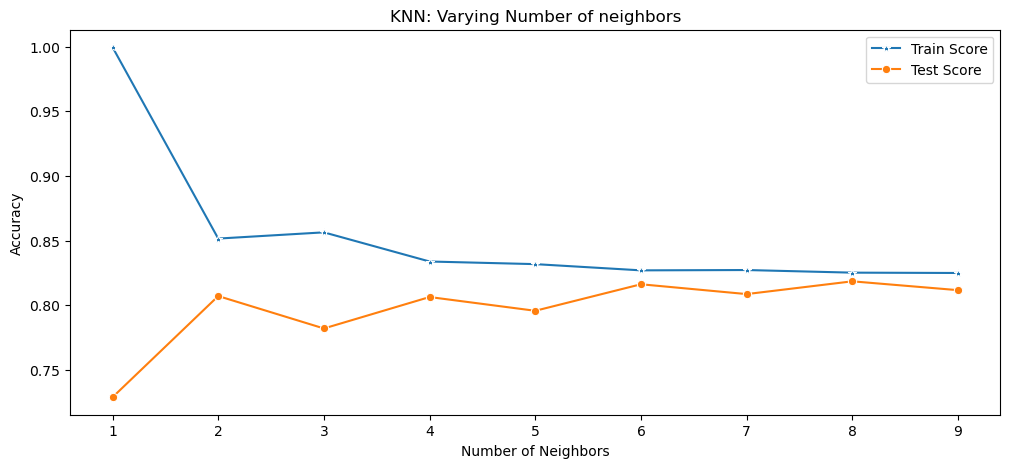

In [64]:
plt.figure(figsize=(12,5))
plt.title('KNN: Varying Number of neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
p = sns.lineplot(range(1,10),train_scores2,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores2,marker='o',label='Test Score')

Like the first try, this model also seems to have an optimal number of neighbors of 8. However, differently from the former, the train score and test score get significantly closer after 6 neighbors with 8 almost being the exact same for test and train score. 

In [65]:
#Fitting and scoring the best number of neighbors based on plot 
i=8
knn8 = KNeighborsClassifier(i)
knn8.fit(Xlrstrat,ylrstrat)

KNeighborsClassifier(n_neighbors=8)

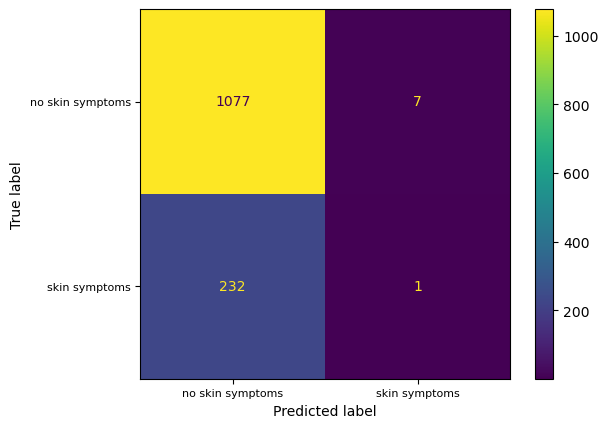

In [66]:
y_pred8 = knn8.predict(Xtestlrstrat)
pl = confusion_matrix(ytestlrstrat,y_pred8, labels = clf.classes_)
_, ax = plt.subplots()
display_pl = ConfusionMatrixDisplay(confusion_matrix = pl, 
                                    display_labels = ['no skin symptoms', 'skin symptoms'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no skin symptoms', 'skin symptoms'], fontsize = 8)
ax.set_yticklabels(labels = ['no skin symptoms', 'skin symptoms'], fontsize = 8)
display_pl.plot(ax = ax)

In [67]:
print(classification_report(ytestlrstrat, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.99      0.90      1084
           2       0.22      0.01      0.02       233

    accuracy                           0.82      1317
   macro avg       0.52      0.50      0.46      1317
weighted avg       0.72      0.82      0.74      1317



Although it is better than the no stratify KNearestneighbor, it is still the worse performing model out of the 3 when it comes to precision, recall, and f1-score of positive skin symptoms. 

## Conclusion  

Reviewing the data, our most positively correlated features include skin symptoms dam, outside under 2 months, and age. Given that some features are categorical (in this case most features) we transformed these with get_dummies. We also made the decision to maintain NaN values as its own count when hot encoding to avoid overfitting or filling null values with the mode and affecting the overall impact of feature on model. Once the hot encoding was completed, we had a set of 5265 rows and 78 columns. We checked the positive correlation of features with skin symptoms again to see if there was any change. As the one done with original data, skin symptoms dam is present as first and second positive feature followed by the puppy not being born in owner’s family (this could be due to the increased medical risks of puppies separated from mom too early). Age is also a positive feature observed in original and one hot encoded set. 

The data was split two different ways to ideally further verify which split was best for modeling. The first split was a simple train_test_split with test size .25 and random_state= 2. The second split has the same 2 parameters but with stratify=y added. Given that our classes are disproportionate with more "no skin symptom" cases than positive ones, stratify tries to preserve as much as possible the proportions among that class. The Age feature also presented 54 null values which we decided to fill with the mean for all splits. 

We looked at 3 models: 
- Logistic regression
- Random forest classifier 
- KNeighborsClassifier. 

All 3 models were run with both splits to identify best case/parameter. 
We also evaluated the test size of the split to see if this was a significant indicator of performance. There was no evidence that accuracy had any significant variation when changing the test size. 

Looking into the models, all 6 (2 of each) had issues and low performance scores when correctly predicting skin symptoms. Likewise, all of them performed significantly well when correctly predicting no skin symptom. 

In conclusion, the best overall model based on weighted average scores is Logistic regression with the stratified split. 
   - Precision: 78% Recall: 83% f1-score: 76% 

However, while the overall accuracy of this model was 83%, it is not as “accurate” when looking into specific class prediction. 
- When it predicts skin condition, 44% of the time it is predicting a false positive. 
- With false negatives (predicting no skin symptoms when in fact there is skin symptom) is about 17%. 

This information can be discussed to decide which is more important, reducing false positives or false negatives, assuming overall accuracy is acceptable. 

The worst performing model was KNeighbors Classifier, even when the stratified data was used, the overall weighted average scores were as follows: 
   - Precision: 72% Recall: 82% f1-score: 74%. 
